# Twitter Sentiment Analysis: A Case of FitBit Fitness Trackers

This analysis aimed to extract tweets using Twitter API keys for a sentiment and thematic analysis on over 100 random tweets and comments on FitBit trackers. The analysis involved importing the necessary Python libraries for the text pre-processing, sentiment analysis and creating data visualizations. Key insights and limitations of the analytical approach and tools were also highlighted.

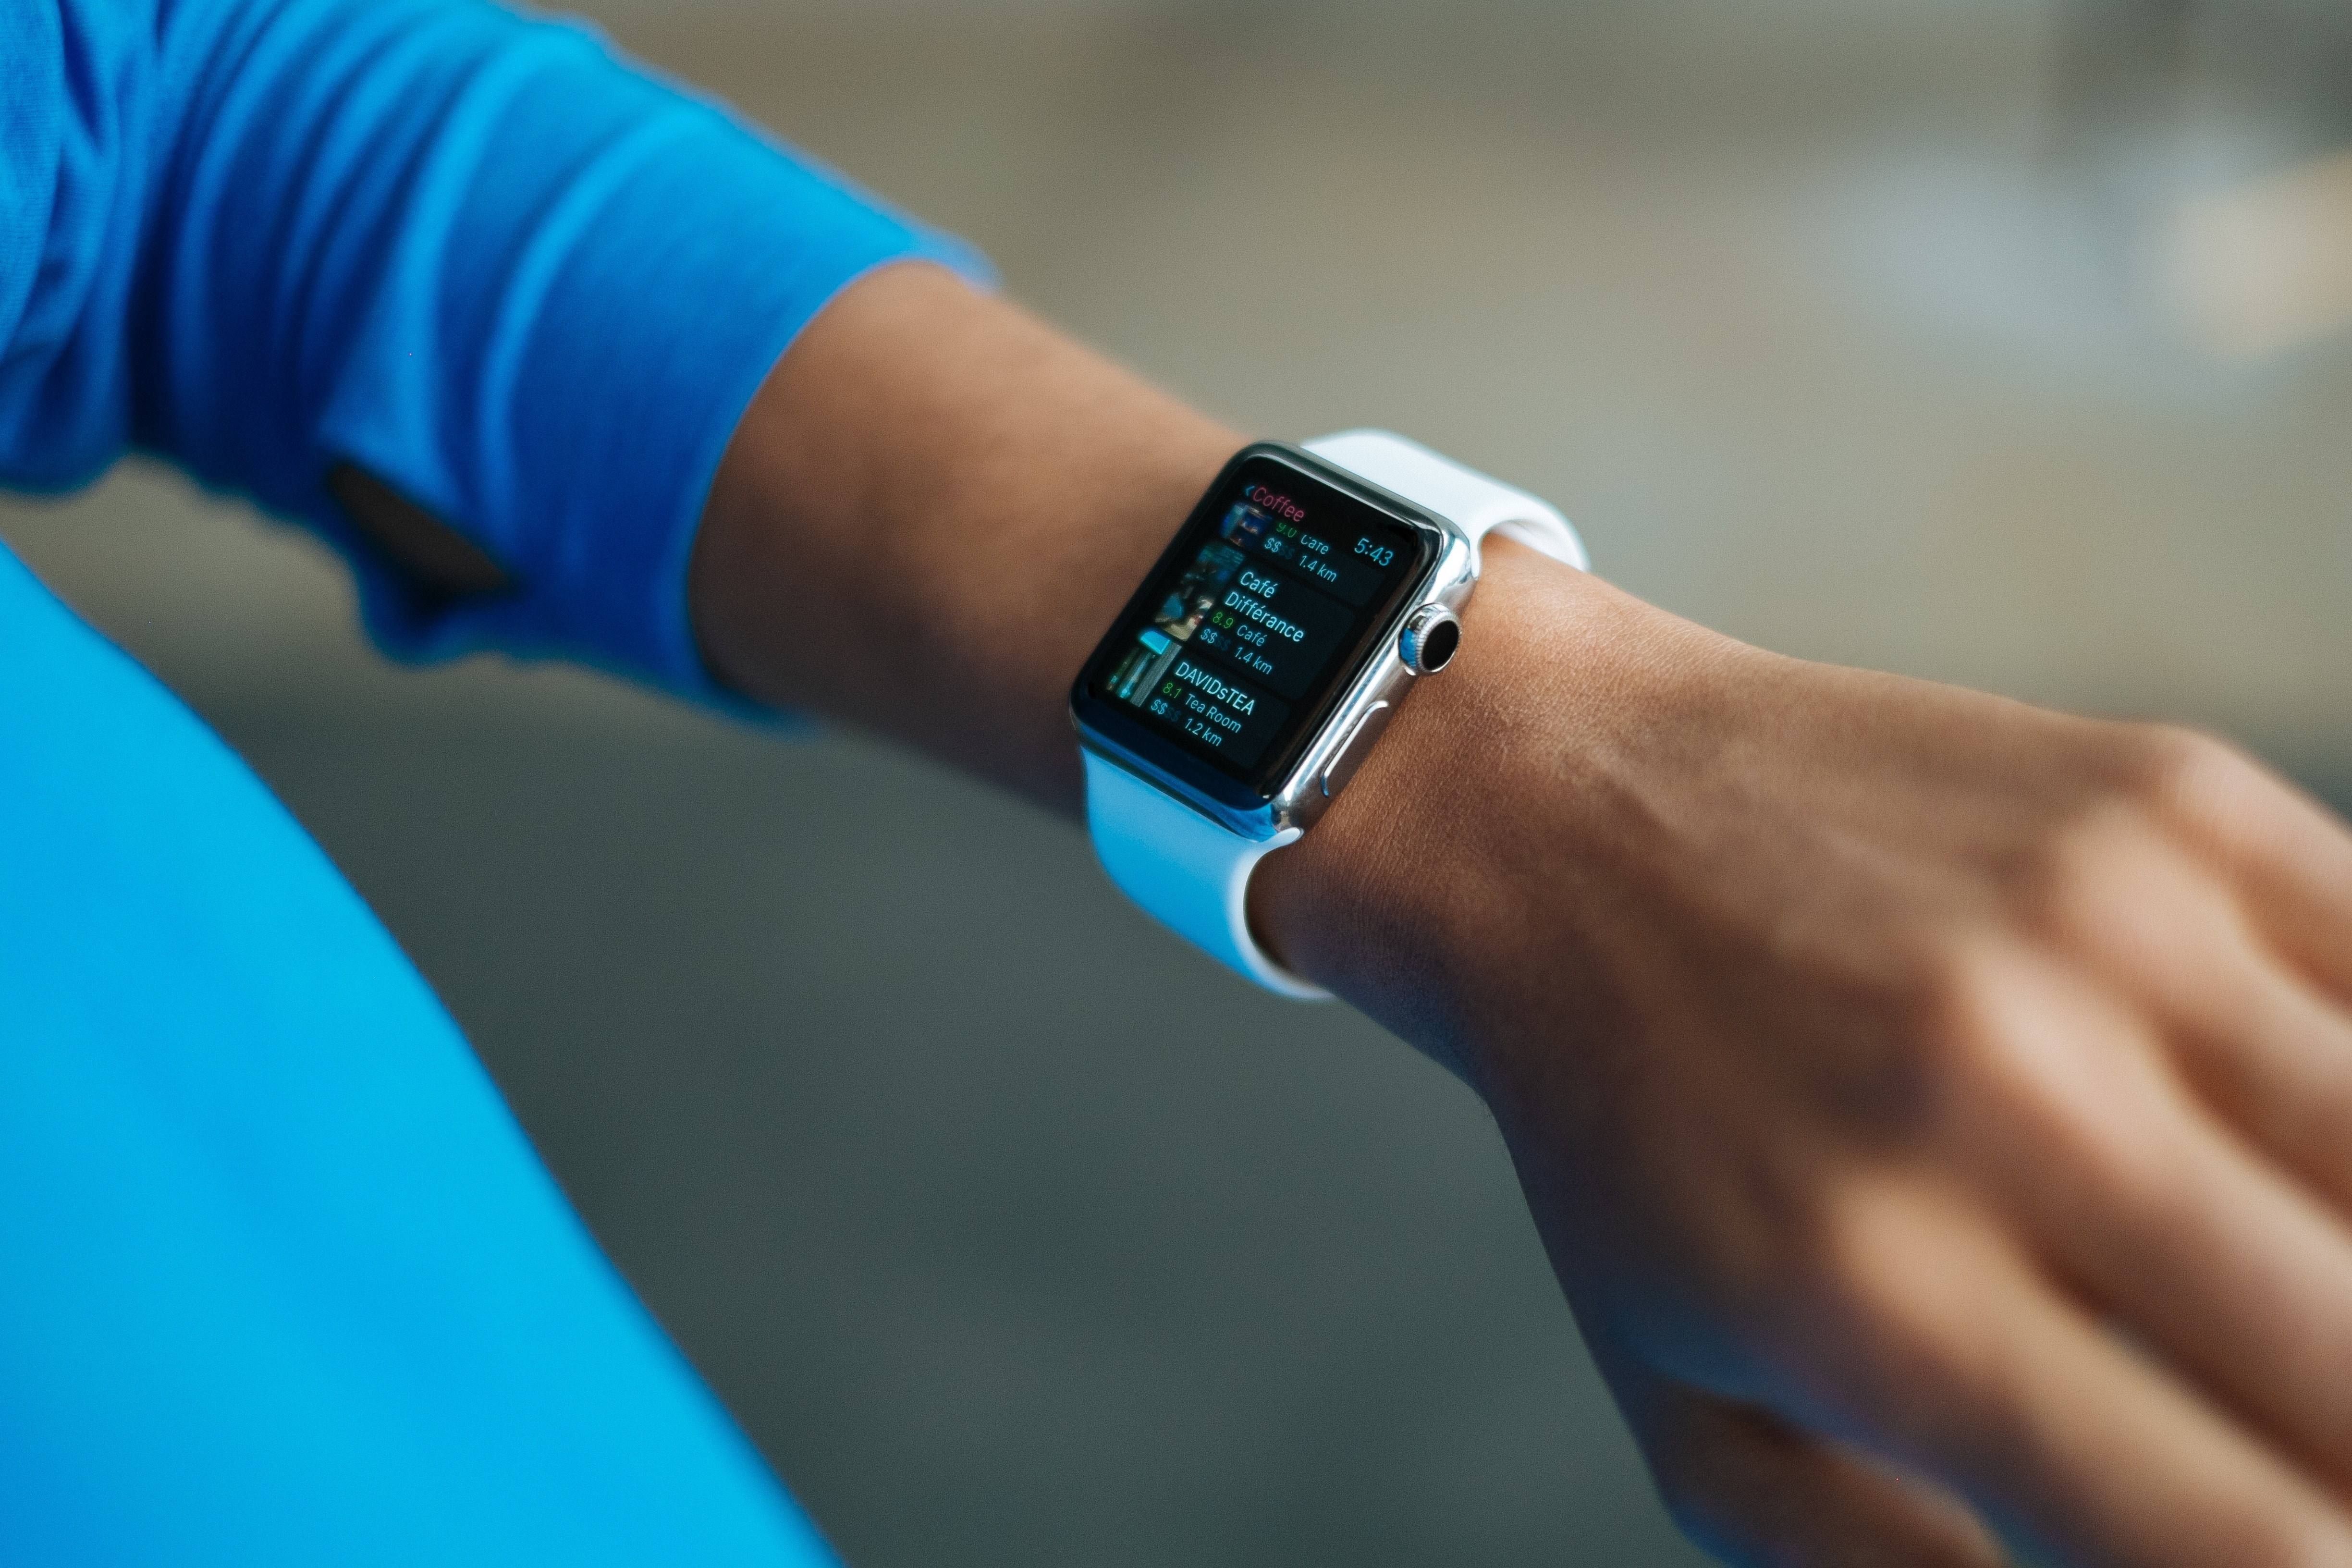

In [1]:
# Importing the necessary libraries
import tweepy
import configparser
import pandas as pd
from textblob import TextBlob
import sys

In [2]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from cleantext import clean

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [3]:
# Downloading nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Read configs
config= configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

print(api_key)

In [18]:
# Authenticating requests to the Twitter API
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

fitbit_tweets = tweepy.Cursor(api.search_tweets, q='fitbits', tweet_mode='extended', lang='en').items(250)

columns = ['Time','User', 'Tweet']
data = []

for tweet in fitbit_tweets:
    final_text = tweet.full_text.replace('RT', '')
    final_text = re.sub(r'@\w+:\s*', '', final_text)
    final_text = re.sub(r'#\w+\s+', '', final_text)
    final_text = re.sub(r'@\w+', '', final_text)
    data.append([tweet.created_at, tweet.user.screen_name, final_text])

# Saving the extracted tweets into a CSV file
df = pd.DataFrame(data=data, columns=columns)
df.to_csv('fitbit.csv', index=False)

In [4]:
# Reading the CSV file into the dataframe
fitbit_df = pd.read_csv('fitbit.csv')

## Assessing the data

In [5]:
# Assessing the first 20 rows of the data
fitbit_df.head(20)

Time             User  \
0   2023-05-03 12:03:33+00:00   TonyGilesSport   
1   2023-05-03 10:15:05+00:00        parkrunUK   
2   2023-05-02 21:35:04+00:00         jasxcals   
3   2023-05-02 19:44:22+00:00    imjaewilliams   
4   2023-05-02 19:15:14+00:00     BigBoyBrody_   
5   2023-05-02 17:03:01+00:00     LibertyMomCA   
6   2023-05-02 11:27:42+00:00    gimmesolefood   
7   2023-05-02 05:54:34+00:00  LehakoeLaBakone   
8   2023-05-02 04:21:13+00:00    Claudine_Nich   
9   2023-05-02 03:06:00+00:00       darwinnnyt   
10  2023-05-02 02:21:49+00:00       Hog4Royals   
11  2023-05-02 01:54:06+00:00      Autiimaries   
12  2023-05-02 01:51:12+00:00      Autiimaries   
13  2023-05-02 01:34:52+00:00   imagine_garden   
14  2023-05-01 23:36:58+00:00    FitbitSupport   
15  2023-05-01 22:45:51+00:00  ethankingdotcom   
16  2023-05-01 21:23:09+00:00        anbanamba   
17  2023-05-01 17:01:40+00:00     Oldmansknees   
18  2023-05-01 16:50:23+00:00    PonchoRebound   
19  2023-05-01 16:21:25+00:00      danglestein   

                                                Tweet  
0    If you participated in a parkrun in April you...  
1   If you participated in a parkrun in April you ...  
2    fitbits are lowkey inaccurate idk their calor...  
3   I slowly transitioned to apple mainly based on...  
4    What about fitbits or garmins or any other sm...  
5     when will you make a watch with a pedometer?...  
6         Fitbit. My job gave us fitbits as new hires  
7     And you went and insourced the most unfit be...  
8    Hackable Humans at WEF: 'We Can Decode Faces ...  
9   fuck a apple watch we rocking fitbits 🔥 https:...  
10   Been hearing about other members receiving Fi...  
11    Agreed! The only reason I bought a  was for ...  
12    I also only bought my whole family fitbits b...  
13   Learning how to get healthy &amp; how to trac...  
14   Hi, . It helps to understand how your Fitbits...  
15  Learning how to get healthy &amp; how to track...  
16  It’s weird you never see nba players wearing f...  
17   I hear the king gave them all fitbits so he c...  
18  Wearing ten Fitbits so I only have to walk 1,0...  
19     Get a .  We went thru about 4 Fitbit's too ...

In [6]:
# Assessing the concise summary of the dataframe (null values, datatypes, etc.)
fitbit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    165 non-null    object
 1   User    165 non-null    object
 2   Tweet   165 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


In [7]:
# Assessing 20 random values from the dataframe
fitbit_df.sample(20)

Time             User  \
112  2023-04-26 14:19:06+00:00    MCSoundDesign   
35   2023-04-30 14:13:57+00:00      MisterD78UK   
99   2023-04-26 22:32:21+00:00    farahrahman23   
159  2023-04-24 11:08:47+00:00          b_tiwi_   
1    2023-05-03 10:15:05+00:00        parkrunUK   
33   2023-04-30 14:26:07+00:00    SteveTheGh0st   
71   2023-04-27 20:11:18+00:00  irate_conqueror   
37   2023-04-30 14:10:12+00:00   AndreyasAsylum   
126  2023-04-26 13:21:53+00:00    Sciencestweet   
113  2023-04-26 14:08:49+00:00          UPresss   
149  2023-04-25 13:29:14+00:00    Alexblahblah0   
79   2023-04-27 12:47:04+00:00       TeamYunnoh   
119  2023-04-26 13:41:03+00:00  paulpeterson192   
31   2023-04-30 15:34:44+00:00         neledmax   
30   2023-04-30 15:37:54+00:00     yalley_henry   
58   2023-04-28 16:42:57+00:00  fartleksburpees   
109  2023-04-26 15:00:16+00:00   brandsocialapp   
92   2023-04-26 23:16:10+00:00  DavidTMiller_MD   
114  2023-04-26 13:57:03+00:00       theyashvii   
108  2023-04-26 15:00:41+00:00         OnlyWire   

                                                 Tweet  
112   my parents have fitbits and they seem to do w...  
35    On days that I don’t walk I take my Fitbit of...  
99   Have you ever wondered what physiological chan...  
159               You gotta add this fit to fitbits😍🤌🏿  
1    If you participated in a parkrun in April you ...  
33    On days that I don’t walk I take my Fitbit of...  
71   So what's Amazon and fitbits deal where it won...  
37   On days that I don’t walk I take my Fitbit off...  
126  New: Best Fitbits (2023): Trackers, Watches, G...  
113  The Best Fitbits for Every Type of Activity\n\...  
149    I’m so old that I know that pedometers were ...  
79   Best Fitbits (2023): Trackers, Watches, GPS, H...  
119  Best Fitbits (2023): Trackers, Watches, GPS, H...  
31    On days that I don’t walk I take my Fitbit of...  
30    On days that I don’t walk I take my Fitbit of...  
58     getting an education to create carbon captur...  
109  Best Fitbits (2023): Trackers, Watches, GPS, H...  
92    Have you ever wondered what physiological cha...  
114  Best Fitbits (2023): Trackers, Watches, GPS, H...  
108  Best Fitbits (2023): Trackers, Watches, GPS, H...

In [8]:
# Checking for null values in each column
fitbit_df.isnull().sum()

Time     0
User     0
Tweet    0
dtype: int64

In [9]:
# Checking for duplicated values in each column
fitbit_df.duplicated().sum()

0

In [10]:
# Creating a function to clean up the data set for irrelevant information
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove emojis
    text = clean(text, no_emoji=True)
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text data
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text


In [11]:
# Applying the function to the Tweet column of the dataframe
fitbit_df['Tweet'] = fitbit_df['Tweet'].apply(clean_text)

In [28]:
# Saving the cleaned data in the dataframe in a new CSV file
fitbit_df.to_csv('clned_fitbit_df.csv', index=False)

In [12]:
# Reading the cleaned data in the CSV file into a new dataframe
cleaned_fitbit_df = pd.read_csv('clned_fitbit_df.csv')

In [13]:
# Assessing the first 20 values in the dataset
cleaned_fitbit_df.head(20)

Time             User  \
0   2023-05-03 12:03:33+00:00   TonyGilesSport   
1   2023-05-03 10:15:05+00:00        parkrunUK   
2   2023-05-02 21:35:04+00:00         jasxcals   
3   2023-05-02 19:44:22+00:00    imjaewilliams   
4   2023-05-02 19:15:14+00:00     BigBoyBrody_   
5   2023-05-02 17:03:01+00:00     LibertyMomCA   
6   2023-05-02 11:27:42+00:00    gimmesolefood   
7   2023-05-02 05:54:34+00:00  LehakoeLaBakone   
8   2023-05-02 04:21:13+00:00    Claudine_Nich   
9   2023-05-02 03:06:00+00:00       darwinnnyt   
10  2023-05-02 02:21:49+00:00       Hog4Royals   
11  2023-05-02 01:54:06+00:00      Autiimaries   
12  2023-05-02 01:51:12+00:00      Autiimaries   
13  2023-05-02 01:34:52+00:00   imagine_garden   
14  2023-05-01 23:36:58+00:00    FitbitSupport   
15  2023-05-01 22:45:51+00:00  ethankingdotcom   
16  2023-05-01 21:23:09+00:00        anbanamba   
17  2023-05-01 17:01:40+00:00     Oldmansknees   
18  2023-05-01 16:50:23+00:00    PonchoRebound   
19  2023-05-01 16:21:25+00:00      danglestein   

                                                Tweet  
0   participated parkrun april could win fitbit wo...  
1   participated parkrun april could win fitbit wo...  
2   fitbits lowkey inaccurate idk calorie burn alw...  
3   slowly transitioned apple mainly based need go...  
4                          fitbits garmins smartwatch  
5   make watch pedometer fitbits garmins soulless ...  
6                  fitbit job gave u fitbits new hire  
7                went insourced unfit turning fitbits  
8   hackable human wef decode face mind pin talkin...  
9                    fuck apple watch rocking fitbits  
10  hearing member receiving fitbits plan close ye...  
11  agreed reason bought challenge bought least fi...  
12  also bought whole family fitbits challenge kid...  
13  learning get healthy track health important us...  
14  hi help understand fitbits measure step distan...  
15  learning get healthy track health important us...  
16  weird never see nba player wearing fitbits gam...  
17               hear king gave fitbits check shirker  
18                  wearing ten fitbits walk step day  
19  get went thru fitbit absolute trash garmin eve...

In [14]:
# Checking for the number of duplicated values in the Tweet column
duplicate_tweet_count = cleaned_fitbit_df.duplicated(['Tweet']).sum()
duplicate_tweet_count

49

In [15]:
# Filtering out the 49 duplicated tweets
duplicate_tweet = cleaned_fitbit_df[cleaned_fitbit_df.duplicated(['Tweet'])]
duplicate_tweet

Time             User  \
29   2023-04-30 20:24:55+00:00  michell01235876   
30   2023-04-30 15:37:54+00:00     yalley_henry   
31   2023-04-30 15:34:44+00:00         neledmax   
32   2023-04-30 15:03:24+00:00      TuskJenkins   
33   2023-04-30 14:26:07+00:00    SteveTheGh0st   
34   2023-04-30 14:25:54+00:00           grHoss   
35   2023-04-30 14:13:57+00:00      MisterD78UK   
36   2023-04-30 14:10:50+00:00      JennSlowpez   
73   2023-04-27 18:33:24+00:00     UribeJeffrey   
75   2023-04-27 15:33:45+00:00   yoursexmedjour   
76   2023-04-27 14:23:33+00:00  FarhanQureshi30   
78   2023-04-27 13:56:57+00:00        Paschal__   
79   2023-04-27 12:47:04+00:00       TeamYunnoh   
80   2023-04-27 12:00:07+00:00         AnniPage   
81   2023-04-27 11:40:23+00:00       ParrisDiaz   
85   2023-04-27 02:42:01+00:00     RSoistmann52   
86   2023-04-27 01:52:45+00:00       UNCurology   
87   2023-04-27 01:40:05+00:00      AnthonyTett   
88   2023-04-27 00:52:17+00:00    justindubinmd   
89   2023-04-27 00:46:21+00:00        mernstUro   
91   2023-04-27 00:02:48+00:00   immuno_goblins   
92   2023-04-26 23:16:10+00:00  DavidTMiller_MD   
93   2023-04-26 23:15:58+00:00      KG_Campbell   
94   2023-04-26 23:15:35+00:00    ranjithramamd   
95   2023-04-26 23:11:34+00:00     ibrahimmdum1   
97   2023-04-26 22:45:40+00:00       susan08713   
98   2023-04-26 22:41:34+00:00     AkhilMuthigi   
100  2023-04-26 19:45:07+00:00  AutomationWorkz   
107  2023-04-26 15:45:36+00:00          br00t4c   
109  2023-04-26 15:00:16+00:00   brandsocialapp   
110  2023-04-26 15:00:13+00:00      RyanRouland   
111  2023-04-26 14:48:04+00:00    datos_digital   
114  2023-04-26 13:57:03+00:00       theyashvii   
115  2023-04-26 13:50:53+00:00         worldbmf   
117  2023-04-26 13:46:25+00:00       prodigy8_t   
119  2023-04-26 13:41:03+00:00  paulpeterson192   
120  2023-04-26 13:35:07+00:00  PC_ExpertOnline   
122  2023-04-26 13:29:22+00:00     HellaDislike   
123  2023-04-26 13:26:33+00:00         D100News   
124  2023-04-26 13:24:09+00:00     gabrielmahia   
125  2023-04-26 13:23:10+00:00      upasakabala   
128  2023-04-26 13:16:09+00:00     CherryLoudon   
130  2023-04-26 13:13:06+00:00     octaviorojas   
133  2023-04-26 13:06:36+00:00     GreenideTech   
134  2023-04-26 13:06:06+00:00   hardik97494342   
135  2023-04-26 13:06:01+00:00   rebben02664383   
136  2023-04-26 13:05:10+00:00        DavidPapp   
137  2023-04-26 13:04:07+00:00      TaniaGlezAZ   
161  2023-04-24 06:16:40+00:00        uglybayo_   

                                                 Tweet  
29   day walk take fitbit bitch another reason fitb...  
30   day walk take fitbit bitch another reason fitb...  
31   day walk take fitbit bitch another reason fitb...  
32   day walk take fitbit bitch another reason fitb...  
33   day walk take fitbit bitch another reason fitb...  
34   day walk take fitbit bitch another reason fitb...  
35   day walk take fitbit bitch another reason fitb...  
36   day walk take fitbit bitch another reason fitb...  
73   ever wondered physiological change body going ...  
75   ever wondered physiological change body going ...  
76   ever wondered physiological change body going ...  
78   ever wondered physiological change body going ...  
79               best fitbits tracker watch gps health  
80               best fitbits tracker watch gps health  
81   ever wondered physiological change body going ...  
85   ever wondered physiological change body going ...  
86   saturday evening sure check inaugural resident...  
87   ever wondered physiological change body going ...  
88   saturday evening sure check inaugural resident...  
89   saturday evening sure check inaugural resident...  
91   ever wondered physiological change body going ...  
92   ever wondered physiological change body going ...  
93   ever wondered physiological change body going ...  
94   ever wondered physiological change body going ...  
95   ever wondered physiological change body going

In [16]:
# Removing duplicate tweets while leaving the first instance they were seen in the dataset
cleaned_fitbit_df.drop_duplicates(subset='Tweet', inplace=True)

In [17]:
# Assessing the first 20 values of the dataset for further scrutiny
cleaned_fitbit_df.head(20)

Time             User  \
0   2023-05-03 12:03:33+00:00   TonyGilesSport   
1   2023-05-03 10:15:05+00:00        parkrunUK   
2   2023-05-02 21:35:04+00:00         jasxcals   
3   2023-05-02 19:44:22+00:00    imjaewilliams   
4   2023-05-02 19:15:14+00:00     BigBoyBrody_   
5   2023-05-02 17:03:01+00:00     LibertyMomCA   
6   2023-05-02 11:27:42+00:00    gimmesolefood   
7   2023-05-02 05:54:34+00:00  LehakoeLaBakone   
8   2023-05-02 04:21:13+00:00    Claudine_Nich   
9   2023-05-02 03:06:00+00:00       darwinnnyt   
10  2023-05-02 02:21:49+00:00       Hog4Royals   
11  2023-05-02 01:54:06+00:00      Autiimaries   
12  2023-05-02 01:51:12+00:00      Autiimaries   
13  2023-05-02 01:34:52+00:00   imagine_garden   
14  2023-05-01 23:36:58+00:00    FitbitSupport   
15  2023-05-01 22:45:51+00:00  ethankingdotcom   
16  2023-05-01 21:23:09+00:00        anbanamba   
17  2023-05-01 17:01:40+00:00     Oldmansknees   
18  2023-05-01 16:50:23+00:00    PonchoRebound   
19  2023-05-01 16:21:25+00:00      danglestein   

                                                Tweet  
0   participated parkrun april could win fitbit wo...  
1   participated parkrun april could win fitbit wo...  
2   fitbits lowkey inaccurate idk calorie burn alw...  
3   slowly transitioned apple mainly based need go...  
4                          fitbits garmins smartwatch  
5   make watch pedometer fitbits garmins soulless ...  
6                  fitbit job gave u fitbits new hire  
7                went insourced unfit turning fitbits  
8   hackable human wef decode face mind pin talkin...  
9                    fuck apple watch rocking fitbits  
10  hearing member receiving fitbits plan close ye...  
11  agreed reason bought challenge bought least fi...  
12  also bought whole family fitbits challenge kid...  
13  learning get healthy track health important us...  
14  hi help understand fitbits measure step distan...  
15  learning get healthy track health important us...  
16  weird never see nba player wearing fitbits gam...  
17               hear king gave fitbits check shirker  
18                  wearing ten fitbits walk step day  
19  get went thru fitbit absolute trash garmin eve...

In [18]:
# Confirming that the duplicate tweets have been removed
duplicate_tweet_count = cleaned_fitbit_df.duplicated(['Tweet']).sum()
duplicate_tweet_count

0

In [19]:
# Checking for the summary of the cleaned dataframe
cleaned_fitbit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 164
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    116 non-null    object
 1   User    116 non-null    object
 2   Tweet   116 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [20]:
# Assessing the first 20 random values in the dataset
cleaned_fitbit_df.sample(20)

Time             User  \
60   2023-04-28 15:47:57+00:00     drake_monroe   
152  2023-04-25 10:28:25+00:00     ArgyleLouise   
41   2023-04-30 03:18:49+00:00      _psychchild   
54   2023-04-28 22:23:42+00:00         gauntluv   
150  2023-04-25 12:44:04+00:00      NanaFleuree   
53   2023-04-28 22:29:21+00:00         kimbabe7   
26   2023-05-01 03:03:11+00:00    MeganSyverson   
69   2023-04-27 21:59:05+00:00        HYST3R1C4   
138  2023-04-26 03:21:23+00:00   oldtimeslovers   
129  2023-04-26 13:15:40+00:00         fcarmona   
116  2023-04-26 13:48:03+00:00   media_newsnoon   
82   2023-04-27 08:43:52+00:00  iridescent0star   
71   2023-04-27 20:11:18+00:00  irate_conqueror   
2    2023-05-02 21:35:04+00:00         jasxcals   
84   2023-04-27 04:20:12+00:00         atinab46   
163  2023-04-23 22:44:10+00:00    elsieheatherr   
58   2023-04-28 16:42:57+00:00  fartleksburpees   
17   2023-05-01 17:01:40+00:00     Oldmansknees   
118  2023-04-26 13:43:44+00:00     immalgonquin   
28   2023-04-30 20:36:54+00:00    garrynotjerry   

                                                 Tweet  
60   big tech big pharma wanted something good make...  
152  yes includes stopping hideous animal experimen...  
41          anyone one new fitbits one would recommend  
54   omad total net day including fitbits cal burne...  
150  kinda silly funny hi drew hope got fixed using...  
53             waste money purchased fitbits year last  
26   oura seem tracking hr spike accurately tried f...  
69        yall feel fitbits smart watch recommendation  
138  fitbits apple watch allowed achieve workout go...  
129  ready take fitness game next level check lates...  
116        wired best fitbits tracker watch gps health  
82   fitbit detected stressed pm yesterday exactly ...  
71   amazon fitbits deal let purchase one fitbit li...  
2    fitbits lowkey inaccurate idk calorie burn alw...  
84   deal lot guy wear fitbits bracelet however lik...  
163  moot fitbits smart watch specifically use runn...  
58   getting education create carbon capture tech d...  
17                hear king gave fitbits check shirker  
118  whether tracking sleep training k wired tested...  
28   day walk take fitbit bitch another reason fitb...

In [40]:
# Saving the cleaned dataset in a new dataframe for future purpose
cleaned_fitbit_df.to_csv('stored_cleaned_fitbit_df.csv', index=False)

# Text analysis

In [21]:
# Counting the top 100 most commonly-used words identified in the Tweet column
import pandas as pd
from collections import Counter

# Convert the Tweet column to a list of words
words = cleaned_fitbit_df['Tweet'].str.split(expand=True).stack()

# Count the frequency of each word
word_counts = Counter(words)

# Get the 100 most common words
top_words = word_counts.most_common(100)

print(top_words)


[('fitbits', 110), ('watch', 36), ('fitbit', 24), ('apple', 19), ('best', 17), ('health', 16), ('like', 13), ('one', 11), ('tracker', 11), ('step', 10), ('tracking', 10), ('gps', 10), ('dog', 10), ('get', 9), ('fitness', 9), ('bought', 8), ('better', 8), ('activity', 8), ('got', 7), ('year', 7), ('device', 7), ('type', 7), ('time', 6), ('new', 6), ('family', 6), ('use', 6), ('wearing', 6), ('day', 6), ('love', 6), ('thing', 6), ('sleep', 6), ('pick', 6), ('prize', 5), ('find', 5), ('make', 5), ('back', 5), ('help', 5), ('check', 5), ('etc', 5), ('wear', 5), ('including', 5), ('know', 5), ('wearable', 5), ('want', 5), ('google', 5), ('much', 5), ('big', 5), ('april', 4), ('could', 4), ('also', 4), ('need', 4), ('human', 4), ('reason', 4), ('challenge', 4), ('another', 4), ('go', 4), ('accurate', 4), ('never', 4), ('see', 4), ('great', 4), ('feature', 4), ('still', 4), ('take', 4), ('used', 4), ('using', 4), ('lot', 4), ('good', 4), ('sure', 4), ('every', 4), ('wired', 4), ('win', 3), ('

In [42]:
# Assessing the columns where the most frequently-used appeared
filter_tweets = cleaned_fitbit_df[cleaned_fitbit_df['Tweet'].str.contains("health")]
filter_tweets

Time             User  \
13   2023-05-02 01:34:52+00:00   imagine_garden   
15   2023-05-01 22:45:51+00:00  ethankingdotcom   
20   2023-05-01 15:38:40+00:00        DonnaGrrr   
38   2023-04-30 13:50:22+00:00   accordingtowut   
42   2023-04-29 20:29:26+00:00        SE_Jolley   
50   2023-04-29 08:26:55+00:00  Reed33616558724   
74   2023-04-27 18:05:03+00:00  extension13show   
82   2023-04-27 08:43:52+00:00  iridescent0star   
101  2023-04-26 17:21:10+00:00      SciCommClub   
103  2023-04-26 16:29:47+00:00    Lil_Nerd_Face   
106  2023-04-26 16:03:04+00:00            WIRED   
108  2023-04-26 15:00:41+00:00         OnlyWire   
116  2023-04-26 13:48:03+00:00   media_newsnoon   
118  2023-04-26 13:43:44+00:00     immalgonquin   
126  2023-04-26 13:21:53+00:00    Sciencestweet   
131  2023-04-26 13:11:30+00:00          mshwire   
132  2023-04-26 13:10:03+00:00     bergnermedia   

                                                 Tweet  Subjectivity  \
13   learning get healthy track health important us...      0.750000   
15   learning get healthy track health important us...      0.533333   
20   apple watch use health data walking speed gait...      0.612500   
38   many healthy people running talking gadget wea...      0.420000   
42   mobile health component launching fitbits avai...      0.450000   
50   multiple type fitbits dog including fitbit fle...      0.333333   
74               best fitbits tracker watch gps health      0.300000   
82   fitbit detected stressed pm yesterday exactly ...      0.520833   
101  sure think apple watch fitbits great job creat...      0.712963   
103     best fitbits tracker watch gps health technews      0.300000   
106  lured apple watch afford spend big fitbit grea...      0.616667   
108  best fitbits tracker watch gps health whether ...      0.650000   
116        wired best fitbits tracker watch gps health      0.300000   
118  whether tracking sleep training k wired tested...      1.000000   
126          new best fitbits tracker watch gps health      0.377273   
131     new post best fitbits tracker watch gps health      0.377273   
132        best fitbits tracker watch gps health tweet      0.300000   

     Polarity          Score  
13   0.450000       Positive  
15   0.300000       Positive  
20   0.500000       Positive  
38   0.167273       Positive  
42   0.450000       Positive  
50   0.333333       Positive  
74   1.000000  Very Positive  
82   0.012500       Positive  
101  0.466667       Positive  
103  1.000000  Very Positive  
106  0.466667       Positive  
108  1.000000  Very Positive  
116  1.000000  Very Positive  
118  1.000000  Very Positive  
126  0.568182  Very Positive  
131  0.568182  Very Positive  
132  1.000000  Very Positive

## Sentiment analysis

In [23]:
# Importing the necessary libraries for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Creating a function for the Subjectivity analysis
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [25]:
# Creating a function for the Polarity analysis
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [26]:
# Applying the function for both Subjectivity and Polarity analysis on the Tweet column
cleaned_fitbit_df['Subjectivity']=cleaned_fitbit_df['Tweet'].apply(getTextSubjectivity)
cleaned_fitbit_df['Polarity']=cleaned_fitbit_df['Tweet'].apply(getTextPolarity)

In [27]:
# Assessing their effects on the dataframe
cleaned_fitbit_df.head(20)

Time             User  \
0   2023-05-03 12:03:33+00:00   TonyGilesSport   
1   2023-05-03 10:15:05+00:00        parkrunUK   
2   2023-05-02 21:35:04+00:00         jasxcals   
3   2023-05-02 19:44:22+00:00    imjaewilliams   
4   2023-05-02 19:15:14+00:00     BigBoyBrody_   
5   2023-05-02 17:03:01+00:00     LibertyMomCA   
6   2023-05-02 11:27:42+00:00    gimmesolefood   
7   2023-05-02 05:54:34+00:00  LehakoeLaBakone   
8   2023-05-02 04:21:13+00:00    Claudine_Nich   
9   2023-05-02 03:06:00+00:00       darwinnnyt   
10  2023-05-02 02:21:49+00:00       Hog4Royals   
11  2023-05-02 01:54:06+00:00      Autiimaries   
12  2023-05-02 01:51:12+00:00      Autiimaries   
13  2023-05-02 01:34:52+00:00   imagine_garden   
14  2023-05-01 23:36:58+00:00    FitbitSupport   
15  2023-05-01 22:45:51+00:00  ethankingdotcom   
16  2023-05-01 21:23:09+00:00        anbanamba   
17  2023-05-01 17:01:40+00:00     Oldmansknees   
18  2023-05-01 16:50:23+00:00    PonchoRebound   
19  2023-05-01 16:21:25+00:00      danglestein   

                                                Tweet  Subjectivity  Polarity  
0   participated parkrun april could win fitbit wo...      0.250000  0.550000  
1   participated parkrun april could win fitbit wo...      0.416667  0.533333  
2   fitbits lowkey inaccurate idk calorie burn alw...      0.540000  0.160000  
3   slowly transitioned apple mainly based need go...      0.377778 -0.177778  
4                          fitbits garmins smartwatch      0.000000  0.000000  
5   make watch pedometer fitbits garmins soulless ...      0.000000  0.000000  
6                  fitbit job gave u fitbits new hire      0.454545  0.136364  
7                went insourced unfit turning fitbits      0.000000  0.000000  
8   hackable human wef decode face mind pin talkin...      0.100000  0.000000  
9                    fuck apple watch rocking fitbits      0.600000 -0.400000  
10  hearing member receiving fitbits plan close ye...      0.000000  0.000000  
11  agreed reason bought challenge bought least fi...      0.200000 -0.150000  
12  also bought whole family fitbits challenge kid...      0.300000  0.225000  
13  learning get healthy track health important us...      0.750000  0.450000  
14  hi help understand fitbits measure step distan...      0.494444  0.266667  
15  learning get healthy track health important us...      0.533333  0.300000  
16  weird never see nba player wearing fitbits gam...      0.645238 -0.204762  
17               hear king gave fitbits check shirker      0.000000  0.000000  
18                  wearing ten fitbits walk step day      0.000000  0.000000  
19  get went thru fitbit absolute trash garmin eve...      0.761111  0.466667

In [28]:
# Creating a function to categorise the Polarity score into five groups
def getTextAnalysis(a):
    if a < -0.5:
        return "Very Negative"
    elif a >= -0.5 and a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    elif a > 0 and a <= 0.5:
        return "Positive"
    else:
        return "Very Positive"

In [29]:
# Creating a new column titled "Score" based on the output of applying the function to the Polarity column
cleaned_fitbit_df["Score"]=cleaned_fitbit_df['Polarity'].apply(getTextAnalysis)

In [30]:
cleaned_fitbit_df.head()

Time            User  \
0  2023-05-03 12:03:33+00:00  TonyGilesSport   
1  2023-05-03 10:15:05+00:00       parkrunUK   
2  2023-05-02 21:35:04+00:00        jasxcals   
3  2023-05-02 19:44:22+00:00   imjaewilliams   
4  2023-05-02 19:15:14+00:00    BigBoyBrody_   

                                               Tweet  Subjectivity  Polarity  \
0  participated parkrun april could win fitbit wo...      0.250000  0.550000   
1  participated parkrun april could win fitbit wo...      0.416667  0.533333   
2  fitbits lowkey inaccurate idk calorie burn alw...      0.540000  0.160000   
3  slowly transitioned apple mainly based need go...      0.377778 -0.177778   
4                         fitbits garmins smartwatch      0.000000  0.000000   

           Score  
0  Very Positive  
1  Very Positive  
2       Positive  
3       Negative  
4        Neutral

In [31]:
# Filtering out the very positive tweets and calculating their percentage relative to the total number of tweets
very_positive=cleaned_fitbit_df[cleaned_fitbit_df['Score']=="Very Positive"]
print(str(very_positive.shape[0]/(cleaned_fitbit_df.shape[0])*100)+"% of very positive tweets")
very_pos=very_positive.shape[0]/cleaned_fitbit_df.shape[0]*100

15.517241379310345% of very positive tweets


In [32]:
# Filtering out the positive tweets and calculating their percentage relative to the total number of tweets
positive=cleaned_fitbit_df[cleaned_fitbit_df['Score']=="Positive"]
print(str(positive.shape[0]/(cleaned_fitbit_df.shape[0])*100)+"% of positive tweets")
pos=positive.shape[0]/cleaned_fitbit_df.shape[0]*100

43.103448275862064% of positive tweets


In [33]:
# Filtering out the negative tweets and calculating their percentage relative to the total number of tweets
negative=cleaned_fitbit_df[cleaned_fitbit_df['Score']=="Negative"]
print(str(negative.shape[0]/(cleaned_fitbit_df.shape[0])*100)+"% of negative tweets")
neg=negative.shape[0]/cleaned_fitbit_df.shape[0]*100

12.068965517241379% of negative tweets


In [34]:
# Filtering out the very negative tweets and calculating their percentage relative to the total number of tweets
very_negative=cleaned_fitbit_df[cleaned_fitbit_df['Score']=="Very Negative"]
print(str(very_negative.shape[0]/(cleaned_fitbit_df.shape[0])*100)+"% of very negative tweets")
very_neg=very_negative.shape[0]/cleaned_fitbit_df.shape[0]*100

0.0% of very negative tweets


In [35]:
# Filtering out the neutral tweets and calculating their percentage relative to the total number of tweets
neutral=cleaned_fitbit_df[cleaned_fitbit_df['Score']=="Neutral"]
print(str(neutral.shape[0]/(cleaned_fitbit_df.shape[0])*100)+"% of neutral tweets")
neutrall=neutral.shape[0]/cleaned_fitbit_df.shape[0]*100

29.310344827586203% of neutral tweets


# Data visualisation

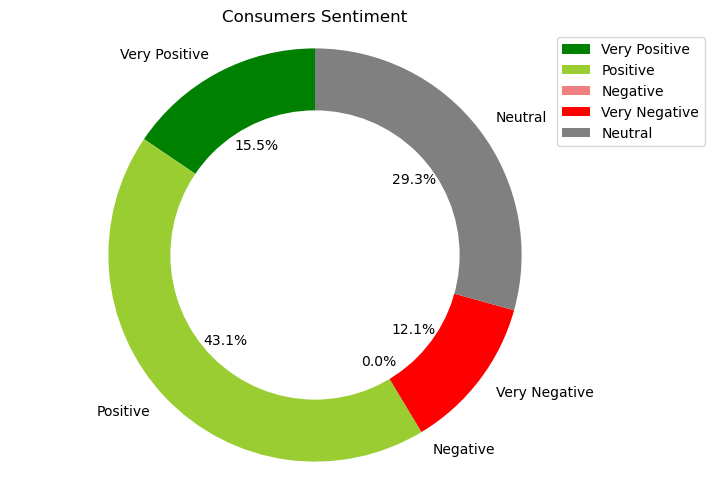

In [36]:
# Plotting a donut chart for the Tweet sentiments

labels = ['Very Positive', 'Positive', 'Negative', 'Very Negative', 'Neutral']
sizes = [very_pos, pos, very_neg, neg, neutrall]
colors = ['green', 'yellowgreen', 'lightcoral', 'red', 'grey']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()

# Add legend and title
plt.legend(labels, bbox_to_anchor=(1.15, 1))
plt.title("Consumers Sentiment")

# Save image as png file
plt.savefig("consumers_sentiment.png")

plt.show()


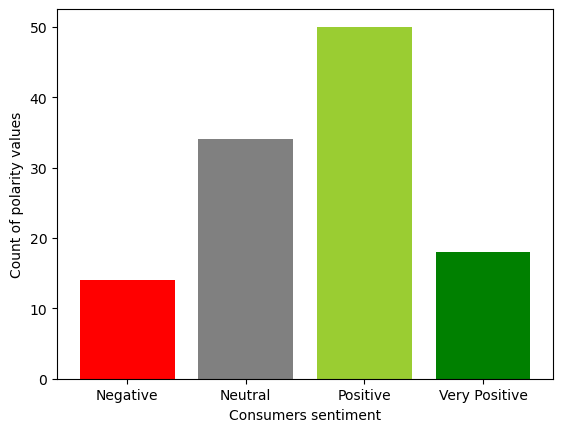

In [38]:
# Plotting a bar chart for the Tweet sentiments

labels = cleaned_fitbit_df.groupby('Score').count().index.values
values = cleaned_fitbit_df.groupby('Score').size().values
colors = ['red', 'grey', 'yellowgreen', 'green', 'lightcoral']
plt.bar(labels,values, color=colors)
plt.xlabel('Consumers sentiment')
plt.ylabel('Count of polarity values')
plt.savefig('bar_chart.png')

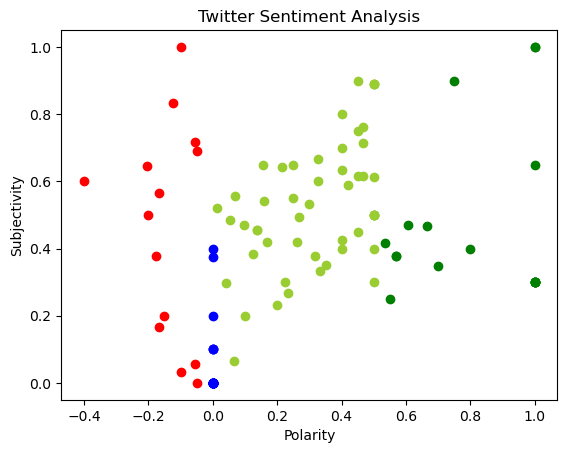

In [45]:
# Creating a scattered plot for the Subjectivity and Polarity Scores

for index, row in cleaned_fitbit_df.iterrows():
    if row['Score']=='Very Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='yellowgreen')
    elif row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Score']=='Very Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='lightcoral')
    elif row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
        
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.savefig('scatter_plot.png')
plt.show()

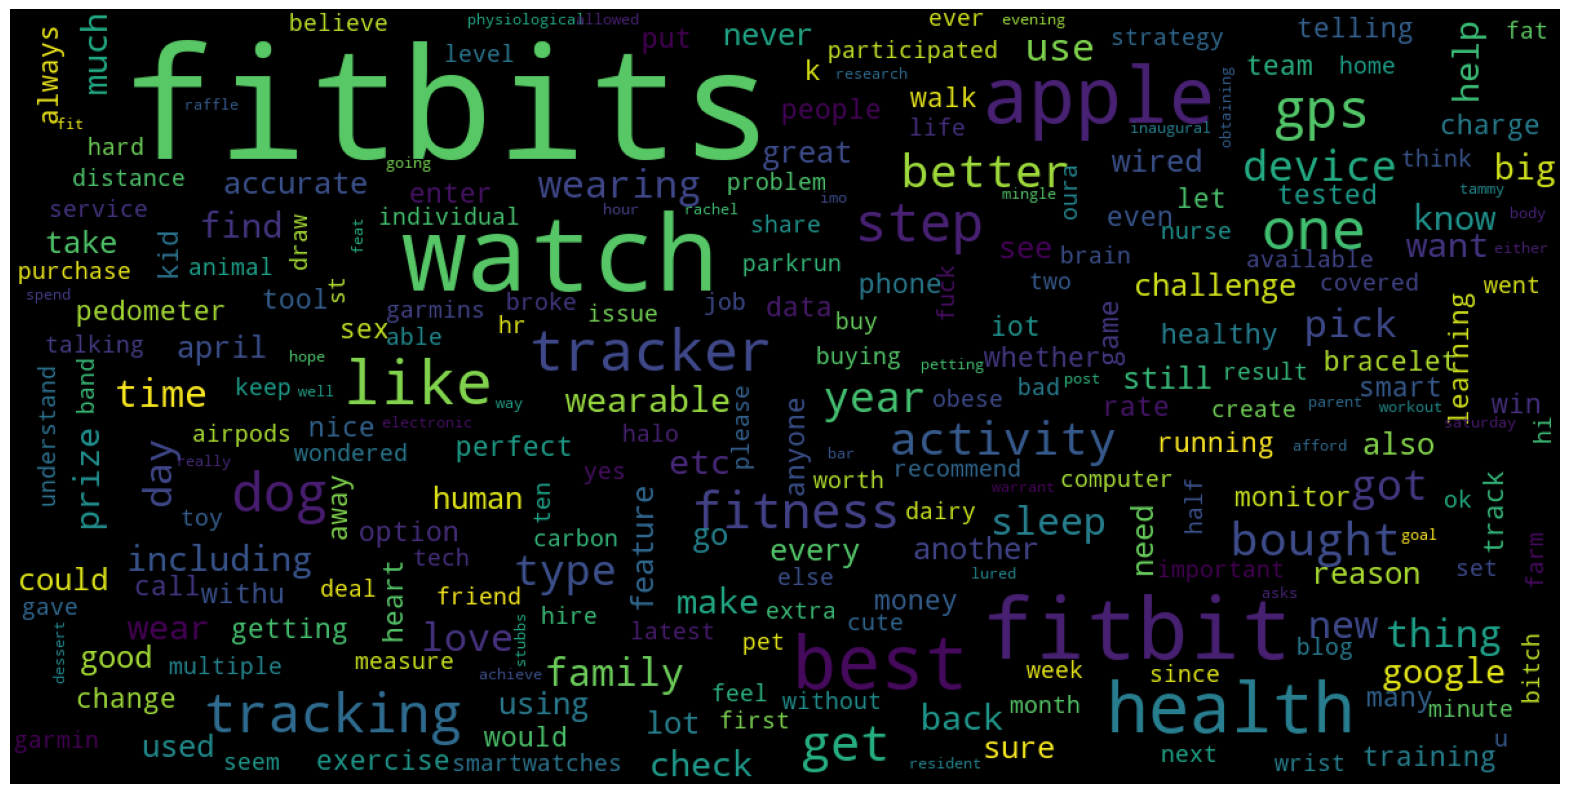

In [50]:
# Creating a word cloud for the most frequently used words in the Tweets for a preliminary thematic analysis

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    word_freq = Counter(data.str.cat(sep=' ').split())
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 250,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize = (20, 20))
    plt.imshow(wordcloud)
    plt.axis("off")
    if title:
        plt.title(title, fontsize = 20)
    plt.savefig('new_wordcloud.png')
    plt.show()
    
show_wordcloud(cleaned_fitbit_df["Tweet"])


In [51]:
cleaned_fitbit_df.head()

Time            User  \
0  2023-05-03 12:03:33+00:00  TonyGilesSport   
1  2023-05-03 10:15:05+00:00       parkrunUK   
2  2023-05-02 21:35:04+00:00        jasxcals   
3  2023-05-02 19:44:22+00:00   imjaewilliams   
4  2023-05-02 19:15:14+00:00    BigBoyBrody_   

                                               Tweet  Subjectivity  Polarity  \
0  participated parkrun april could win fitbit wo...      0.250000  0.550000   
1  participated parkrun april could win fitbit wo...      0.416667  0.533333   
2  fitbits lowkey inaccurate idk calorie burn alw...      0.540000  0.160000   
3  slowly transitioned apple mainly based need go...      0.377778 -0.177778   
4                         fitbits garmins smartwatch      0.000000  0.000000   

           Score  
0  Very Positive  
1  Very Positive  
2       Positive  
3       Negative  
4        Neutral

In [52]:
# Saving the dataframe containing the detailed analysis into a new CSV file for future purpose
cleaned_fitbit_df.to_csv('final_cleaned_fitbit_df.csv', index=False)

# Key Insights

> 1. Following the sentiment analysis, about 15.5% of the tweets were very positive, 43.1% positive, 0.0% negative, 12.1% very negative and 29.3% neutral. In total, this implies that there were 58.6% positive, 12.1% negative and 29.3% neutral comments concerning Fitbits fitness trackers.

> 2. Additionally, the spread on the scattered plot for the sensitivity scores revealed that many of the tweets were highly based on the consumer’s opinion than they were associated with actual facts. It showed the varying degree of subjectivity reflected in the consumer’s tweet, which tended towards the value 1.

> 3. Further analysis revealed the repeated use of words like “watch”, “apple”, and “trackers” to a significant level; many of which were associated with negative feelings about the product. However, due to a limitation in the adopted natural language processing library (TextBlob), this observation was not captured directly in the analysis.

> 4. Notwithstanding, some of the extracted comments reflected varying issues with the product quality, including battery issues, malfunctioning components, inaccurate tracking, etc. As a result, several consumers notably compared FitBit trackers with both Apple and Garmin products in relation to their quality, although they also acknowledged that the latter were more expensive. They expressed their preference over Apple and Garmin products compared to FitBit trackers.

> 5. Some other individuals expressed positive reviews concerning the product’s price range compared to Apple and Garmin. Although consumers expressed strong negative emotions regarding product quality issues associated with FitBits, they still maintained that the products were fairly affordable. This indicates that FitBits somewhat have a competitive edge against Apple and Garmin products.

> 6. Overall, I believe that the 15.5% positive sentiments concerning FitBit trackers point to a critical issue that should be further analysed. As much as it reveals some degree of satisfaction among the consumer base, it also points to the need for the company to examine what they are doing against that of their competitors (Apple and Garmin) in order to improve on the quality of their products. It appears the consumers were particuarly concerning about improving the tracking accuracies of their devices for a variety of health concerns, which was observed across the tweets.

> 7. Given the positive reviews amidst the numerous negative sentiments, it is obvious that FitBit trackers have a competitive edge because of their affordable price against Apple and Garmin. As a result, it is highly recommended that the company could devise sustainable means of improving on the overall quality of their product, in terms of shelf-life, battery life, as well as increased functionalities while maintaining a fairly cheaper and competitive price. 

> 8. There are limitations associated with the Python libraries used for the natural language processing, many of which could not effectively associate the relevance of the words used in the tweets to the sentiment analysis. As such, this created several "false positives" and "false negatives". Notwithstanding, the analysis could not be far from reality, and as such, calls for advanced analysis using machine learning to verify the findings from the sentiment analysis.

> 9. Additionally, the recent modifications of Twitter policies for accessing tweets using their API keys affecting the number of tweets that could be extracted and analysed. As such, there is a need to cautiously generalise the findings of this analysis, pending more robust analysis for larger number of tweets.